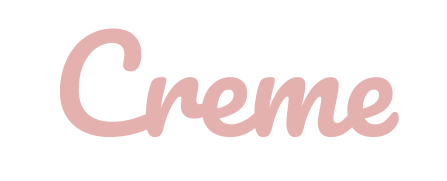

> [**Creme Library**](https://pypi.org/project/creme/)

> [**Creme Library - GitHub**](https://github.com/MaxHalford/creme)

> [**SMS Spam Collection Dataset - Kaggle**](https://www.kaggle.com/uciml/sms-spam-collection-dataset)

In [ ]:
# Install Kaggle.
!pip install --upgrade --force-reinstall --no-deps kaggle

In [ ]:
# Files Upload.
from google.colab import files

files.upload()

In [3]:
# Create a Kaggle Folder.
!mkdir ~/.kaggle

# Copy the kaggle.json to the folder created.
!cp kaggle.json ~/.kaggle/

# Permission for the json file to act.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Dataset Download.
!kaggle datasets download -d uciml/sms-spam-collection-dataset

In [ ]:
# Unzip Dataset.
!unzip sms-spam-collection-dataset.zip

# **Online or Incremental Learning - Machine Learning Retraining Approaches**

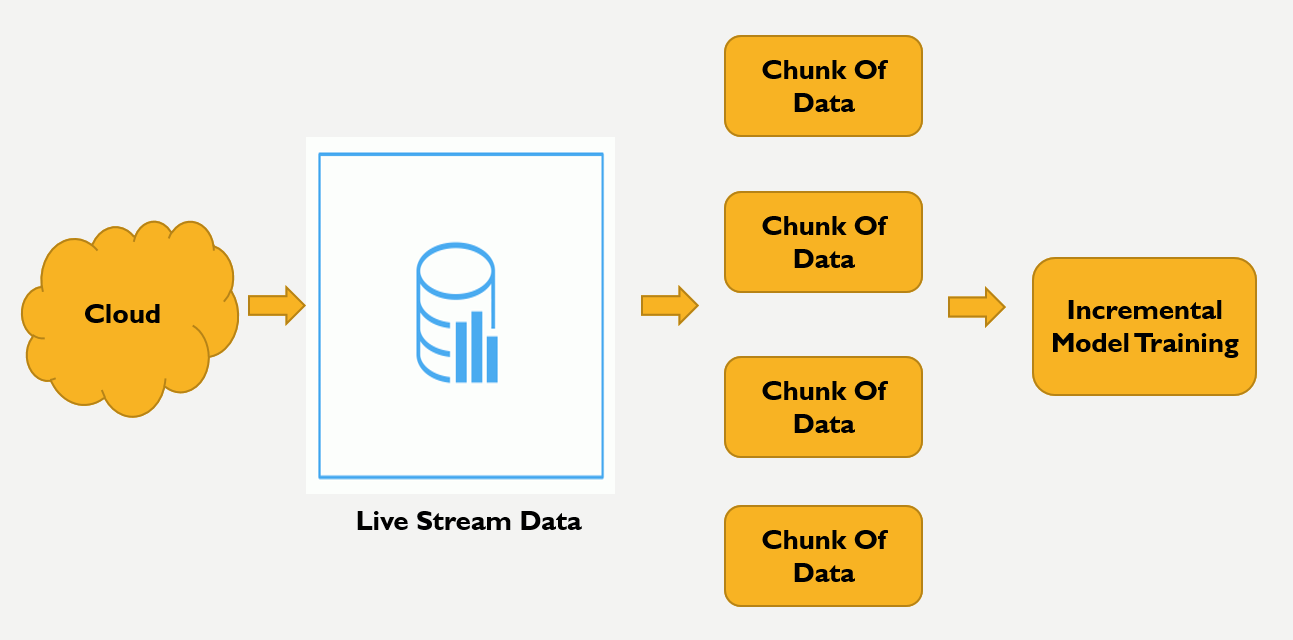

In [ ]:
!pip install creme

In [7]:
# Import Library.
import pandas as pd
import creme
from creme import compose, feature_extraction, naive_bayes, metrics
from sklearn.model_selection import train_test_split

# Load Dataset.
data = pd.read_csv("spam.csv", encoding="ISO-8859-1").iloc[:, 0:2]
print(data.head())

# Split Dataset into Training and Test Set.
X_train, X_test = train_test_split(data)

# Convert Dataframe into a list of tuples.
X_train = X_train.to_records(index=False)
X_test = X_test.to_records(index=False)

# Creating the Incremental Learning Pipeline.
# 1st function is creating the TF-IDF.
# 2nd function is the Naive Bayes Predictor.

model = compose.Pipeline(
    ("tokenize", feature_extraction.TFIDF(lowercase=False)),
    ("nb", naive_bayes.MultinomialNB(alpha=1)),
)
metric = metrics.Accuracy()

# Training the Model Row by Row.
for label, sentence in X_train:
    model = model.fit_one(sentence, label)
    y_pred = model.predict_one(sentence)
    metric = metric.update(label, y_pred)

# Training Data Accuracy.
print("\nTraining Data Accuracy is ", metric)

# Testing the Model.
test_metric = metrics.Accuracy()
for label, sentence in X_test:
    y_pred = model.predict_one(sentence)
    test_metric = metric.update(label, y_pred)

# Testing Data Accuracy.
print("Testing Data Accuracy is ", test_metric)

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Training Data Accuracy is  Accuracy: 95.76%
Testing Data Accuracy is  Accuracy: 95.98%


In [8]:
# Adding More Training Data (Incremental Learning)
model.fit_one("This guy is neutral", "ham")
model.fit_one("Everybody is neutral", "ham")

Pipeline (
  TFIDF (
    normalize=True
    on=None
    strip_accents=True
    lowercase=False
    preprocessor=None
    tokenizer=<built-in method findall of re.Pattern object at 0x7fa7b878e2a0>
    ngram_range=(1, 1)
  ),
  MultinomialNB (
    alpha=1
  )
)

# **Notable Library for Online Machine Learning**

> [**River Library - A Python package for online/streaming machine learning**](https://riverml.xyz/latest/)

> [**River Library - Github**](https://github.com/online-ml/river)



